In [2]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.describe
test.head()



,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

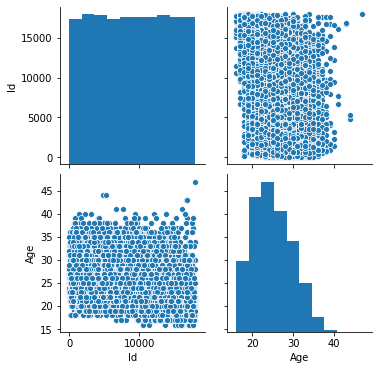

In [4]:
# Code Starts here
sns.pairplot(train[['Id', 'Age']])
# Code ends here

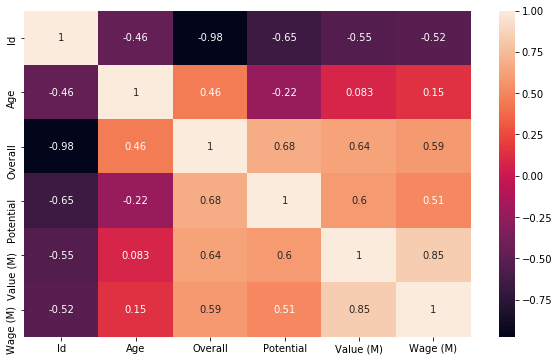

In [5]:
corro = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corro, annot=True)

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [6]:
# Code Starts here
drop_cols=['Name', 'Nationality', 'Club', 'Position']
train.drop(columns=drop_cols, axis=1, inplace=True)
test.drop(columns=drop_cols, axis=1, inplace=True)
# Code ends here

In [7]:
train.rename(columns={'Value (M)':'Value', 'Wage (M)':'Wage'}, inplace=True)
test.rename(columns={'Value (M)':'Value', 'Wage (M)':'Wage'}, inplace=True)

#X_train = train[['Overall', 'Potential', 'Wage']]
X_train = train[['Potential', 'Wage']]
y_train = train['Value']
X_train.head()
regression = LinearRegression()
regression.fit(X_train, y_train)

#X_test = test[['Overall', 'Potential', 'Wage']]
X_test = test[['Potential', 'Wage']]
y_pred = regression.predict(X_test)
print('Predicted Value:',y_pred)



Predicted Value: [10.05644576 20.3683011   2.13095825 ...  1.20924833 13.30770923
  6.37968403]


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [8]:
# Code Starts here
id_test = test['Id']
#print('Length of y_pred', len(id_test))

test.head()

import csv
count = 0 
with open('sample_submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Id', 'Value (M)'])
    for ids in id_test:
        writer.writerow([id_test[count], y_pred[count]])
        count = count+1 
 
# Code ends here.